## Load libraries

In [145]:
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm

In [146]:
from scipy import signal
import pandas as pd
from IPython.display import display
import sympy

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.signal as signal
import pywt


In [148]:
C = 0.01  # Constant

def calculate_T(coeffs, n, C):
    # Compute standard deviations of signal (Vs(n))
    sigma_Vs = np.std(y_1)

    # Extract detail coefficients at each level
    dj = [coeffs[i] for i in range(1, len(coeffs))]
    
    # Compute standard deviations of detail coefficients
    sigma_dj = [np.std(d) for d in dj]
    
    # Calculate T
    T = [C * np.sqrt((sigma_Vs / sigma) * n) for sigma in sigma_dj]
    
    return T

# Apply soft thresholding
def soft_threshold(coeffs, T_values):
    thresholded_coeffs = coeffs.copy()
    for i in range(1, len(coeffs)):
        thresholded_coeffs[i] = pywt.threshold(coeffs[i], T_values[i-1], mode='soft')
    return thresholded_coeffs

# Basal

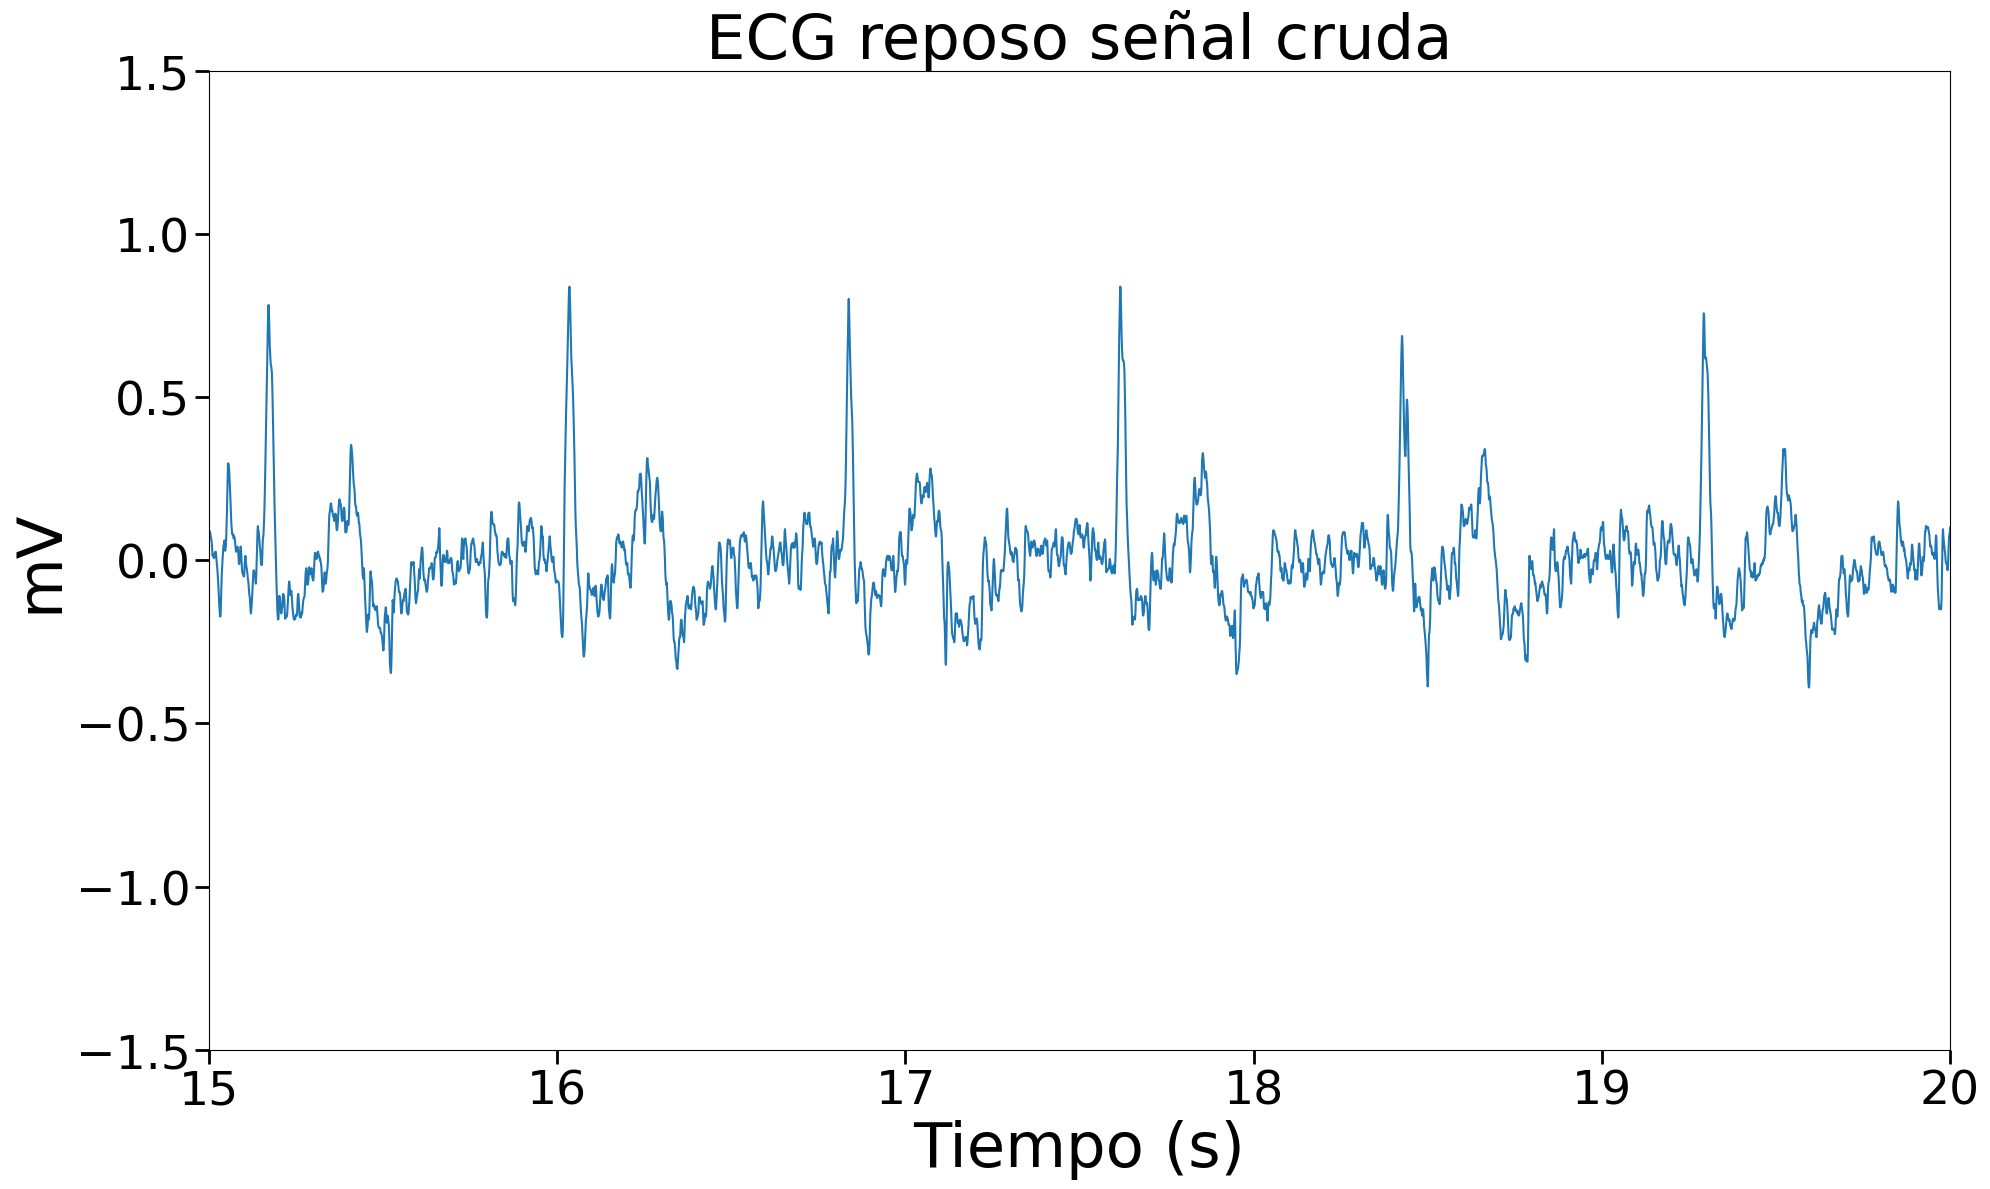

In [149]:
data=np.loadtxt("./../Laboratorio 4/ecg_raw_data/reposo/opensignals_98D341FD4F0D_2024-04-19_12-34-17.txt",skiprows=3)

bits = 10 # Bits de la salida 
volt_range = 3.223 #Rango de voltaje en milivoltios (-1.64; 1.64) mV
data_mV = (data[:,5] * volt_range/(2**bits - 1)) # convertir los bits a mV
data_mV = data_mV - np.mean(data_mV) # Centrar la señal, ya que va de -1.64 a 1.64
time = np.arange(len(data_mV))/1000 

plt.figure(figsize=(20,12))

plt.plot(time,data_mV)

plt.ylim(-1.5, 1.5)
plt.xlim(15, 20)
plt.tick_params(axis='both', which='major', labelsize=34, width=2, length=10)
plt.xlabel('Tiempo (s)', fontsize=45)
plt.ylabel('mV', fontsize=45)
plt.title('ECG reposo señal cruda', fontsize=45)
plt.tight_layout()

plt.savefig("plots/ecg-reposo-cruda.png")

#Tomamos solo 5 segundos de la señal
y_1=data_mV[15000:20000]

Fs = 1000
Ts=1/Fs # Determinar el periodo de muestreo
t_1 = np.arange(0, len(y_1)*Ts, Ts) # Crear vector de tiempo considerando periodo de muestreo



# Basal + Wavelet

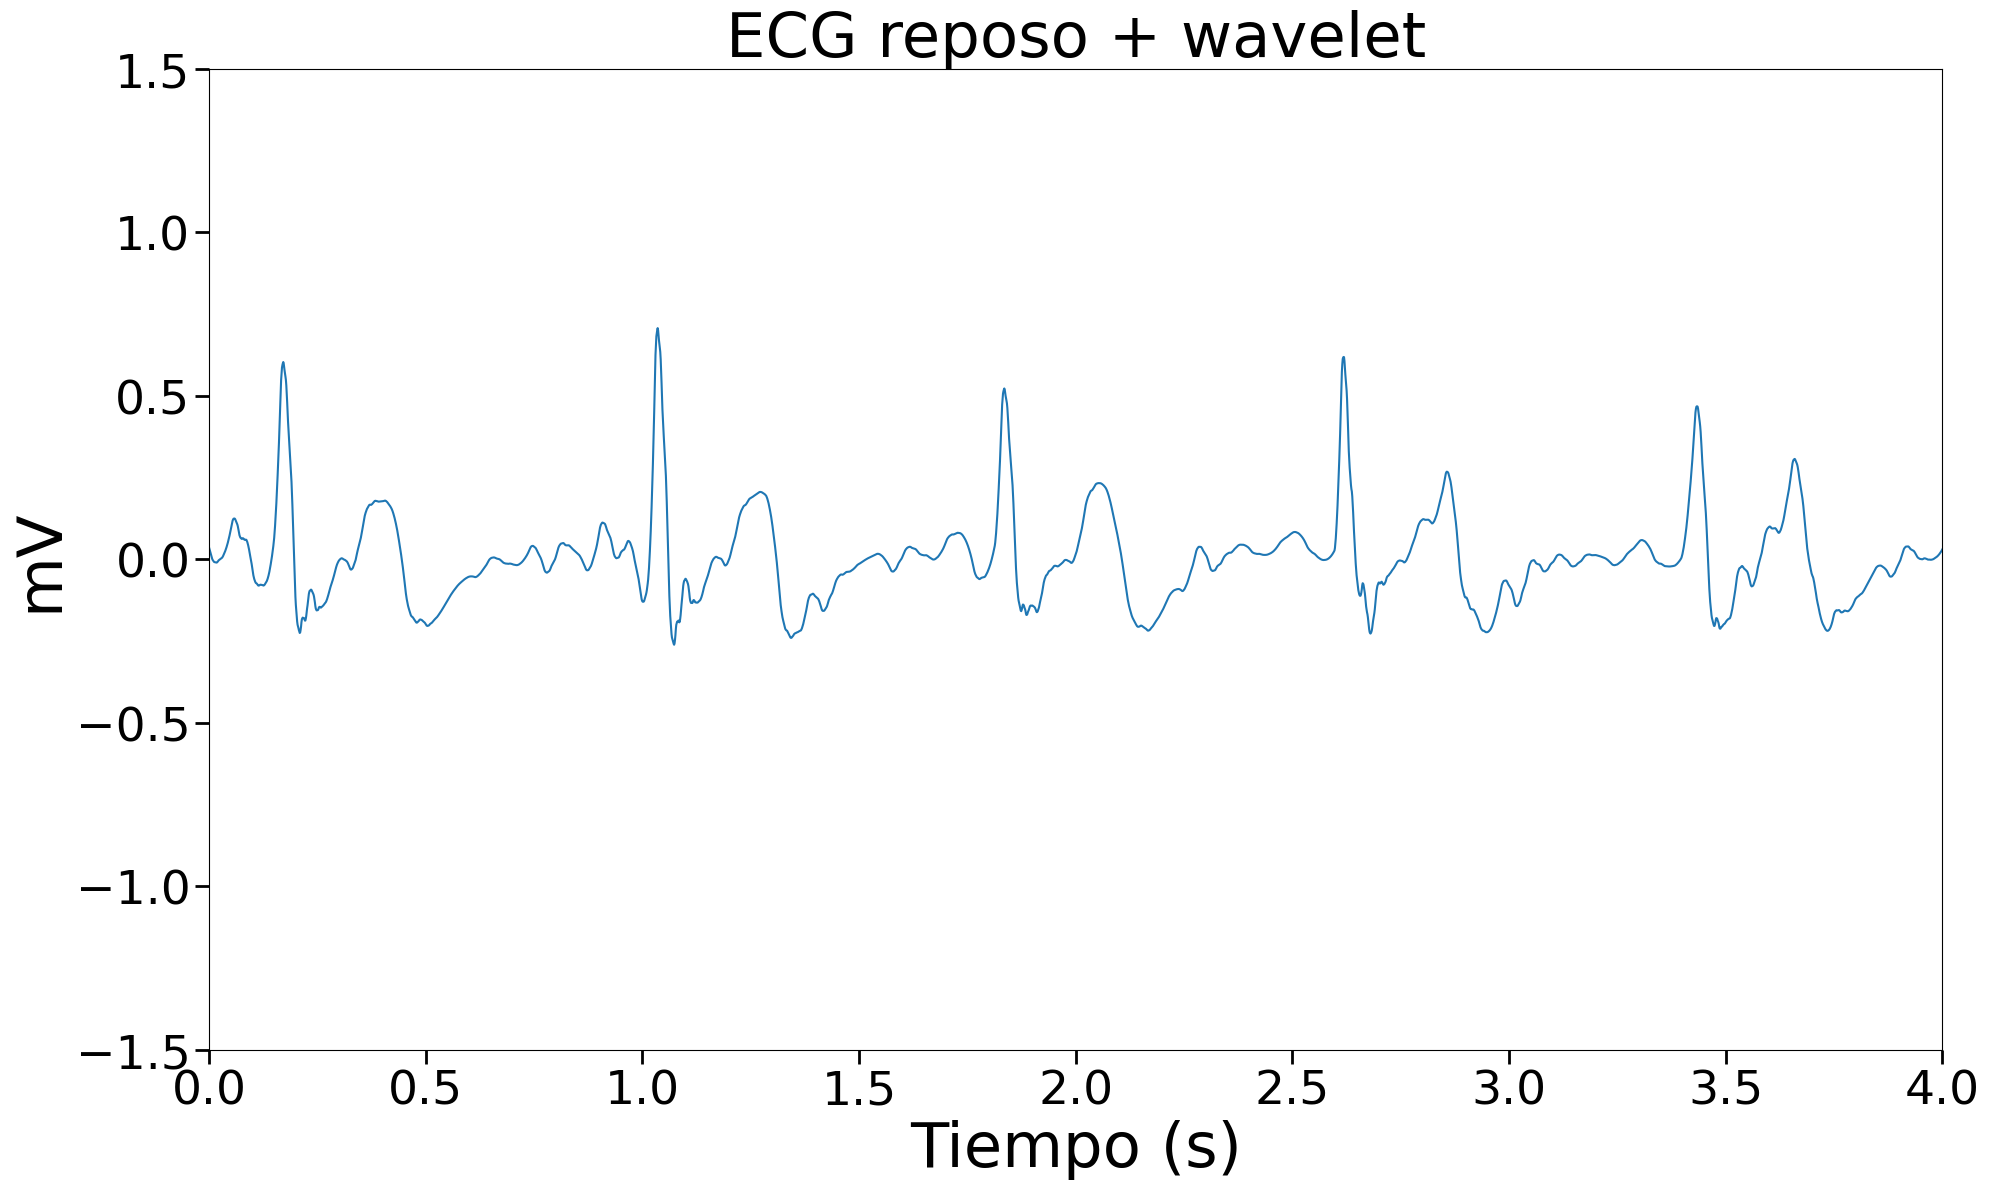

In [150]:
# Calculate coefficients
coeffs = pywt.wavedec(y_1, 'db4', level=5)

# Calculate the thresholds
n = len(y_1)
T_values = calculate_T(coeffs, n, C)

# Apply the thresholds
thresholded_coeffs = soft_threshold(coeffs, T_values)

# Reconstruct the signal
y_denoised = pywt.waverec(thresholded_coeffs, 'db4')

#plot
plt.figure(figsize=(20,12))
plt.plot(t_1, y_denoised, label='Señal Denoised')
plt.ylim(-1.5,1.5)
plt.xlim(0,4)
plt.tick_params(axis='both', which='major', labelsize=34, width=2, length=10)
plt.xlabel('Tiempo (s)', fontsize=45)
plt.ylabel('mV', fontsize=45)
plt.title('ECG reposo + wavelet', fontsize=45)
plt.tight_layout()

plt.savefig("plots/ecg-reposo-wavelet.png")

plt.show()


# Respiración

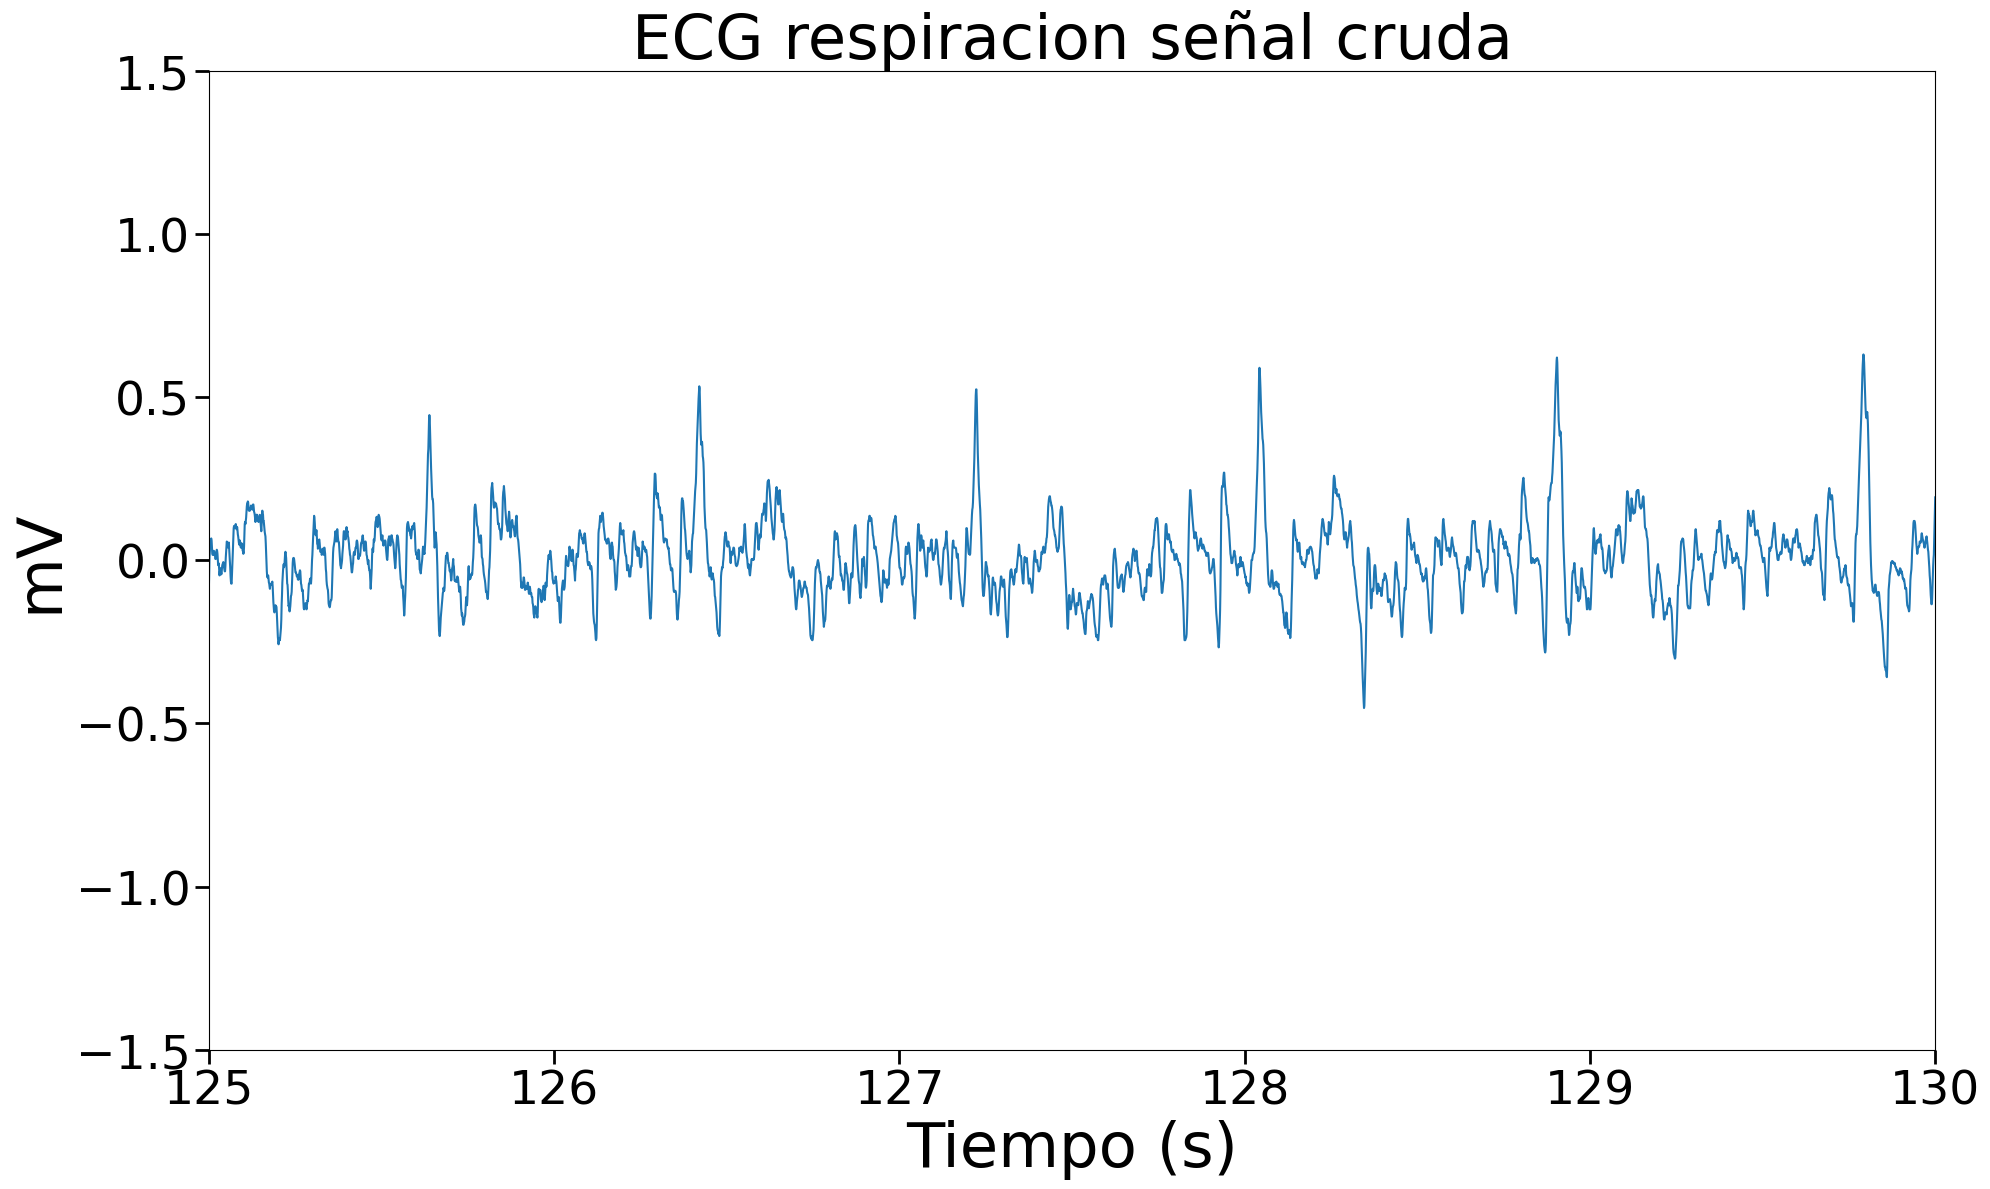

In [151]:
data=np.loadtxt("./../Laboratorio 4/ecg_raw_data/reposo/opensignals_98D341FD4F0D_2024-04-19_12-34-17.txt",skiprows=3)
bits = 10 # Bits de la salida 
volt_range = 3.223 #Rango de voltaje en milivoltios
data_mV = (data[:,5] * volt_range/(2**bits - 1)) # convertir los bits a mV
data_mV = data_mV - np.mean(data_mV) # Centrar la señaltime = np.arange(len(data_mV))/1000 
plt.figure(figsize=(20,12))

plt.plot(time,data_mV)

plt.ylim(-1.5, 1.5)
plt.xlim(125, 130)
plt.tick_params(axis='both', which='major', labelsize=34, width=2, length=10)
plt.xlabel('Tiempo (s)', fontsize=45)
plt.ylabel('mV', fontsize=45)
plt.title('ECG respiracion señal cruda', fontsize=45)
plt.tight_layout()

plt.savefig("plots/ecg-respiracion-cruda.png")

#Tomamos solo 5 segundos de la señal
y_1=data_mV[125000:130000]

Fs = 1000
Ts=1/Fs # Determinar el periodo de muestreo
t_1 = np.arange(0, len(y_1)*Ts, Ts) # Crear vector de tiempo considerando periodo de muestreo



# Respiracion + Wavelet

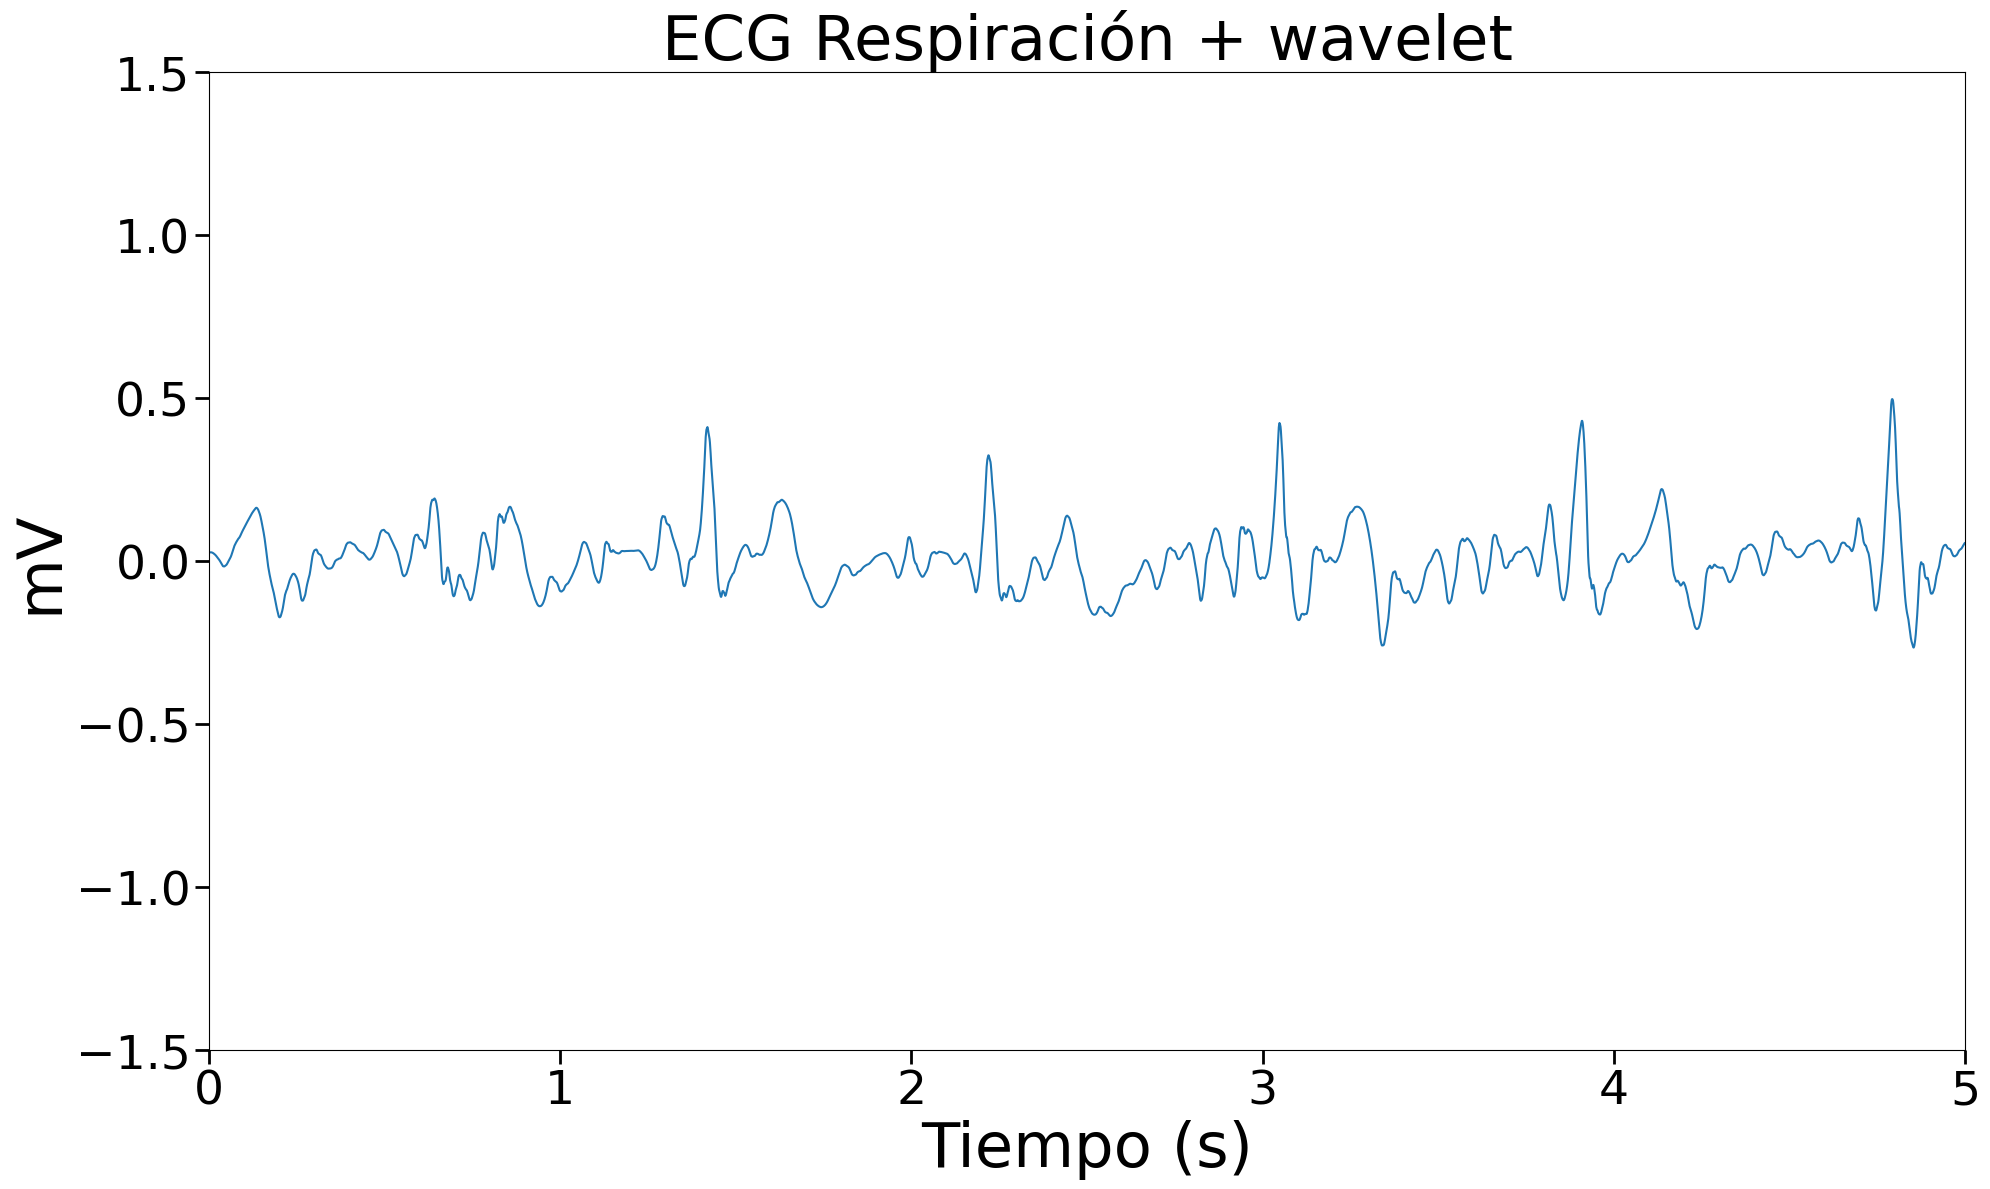

In [152]:
# Calculate coefficients
coeffs = pywt.wavedec(y_1, 'db4', level=5)

# Calculate the thresholds
n = len(y_1)
T_values = calculate_T(coeffs, n, C)

# Apply the thresholds
thresholded_coeffs = soft_threshold(coeffs, T_values)

# Reconstruct the signal
y_denoised = pywt.waverec(thresholded_coeffs, 'db4')

#plot
plt.figure(figsize=(20,12))
plt.plot(t_1, y_denoised, label='Señal Denoised')
plt.ylim(-1.5,1.5)
plt.xlim(0,5)
plt.tick_params(axis='both', which='major', labelsize=34, width=2, length=10)
plt.xlabel('Tiempo (s)', fontsize=45)
plt.ylabel('mV', fontsize=45)
plt.title('ECG Respiración + wavelet', fontsize=45)
plt.tight_layout()

plt.savefig("plots/ecg-respiracion-wavelet.png")

plt.show()


# Ejercicio

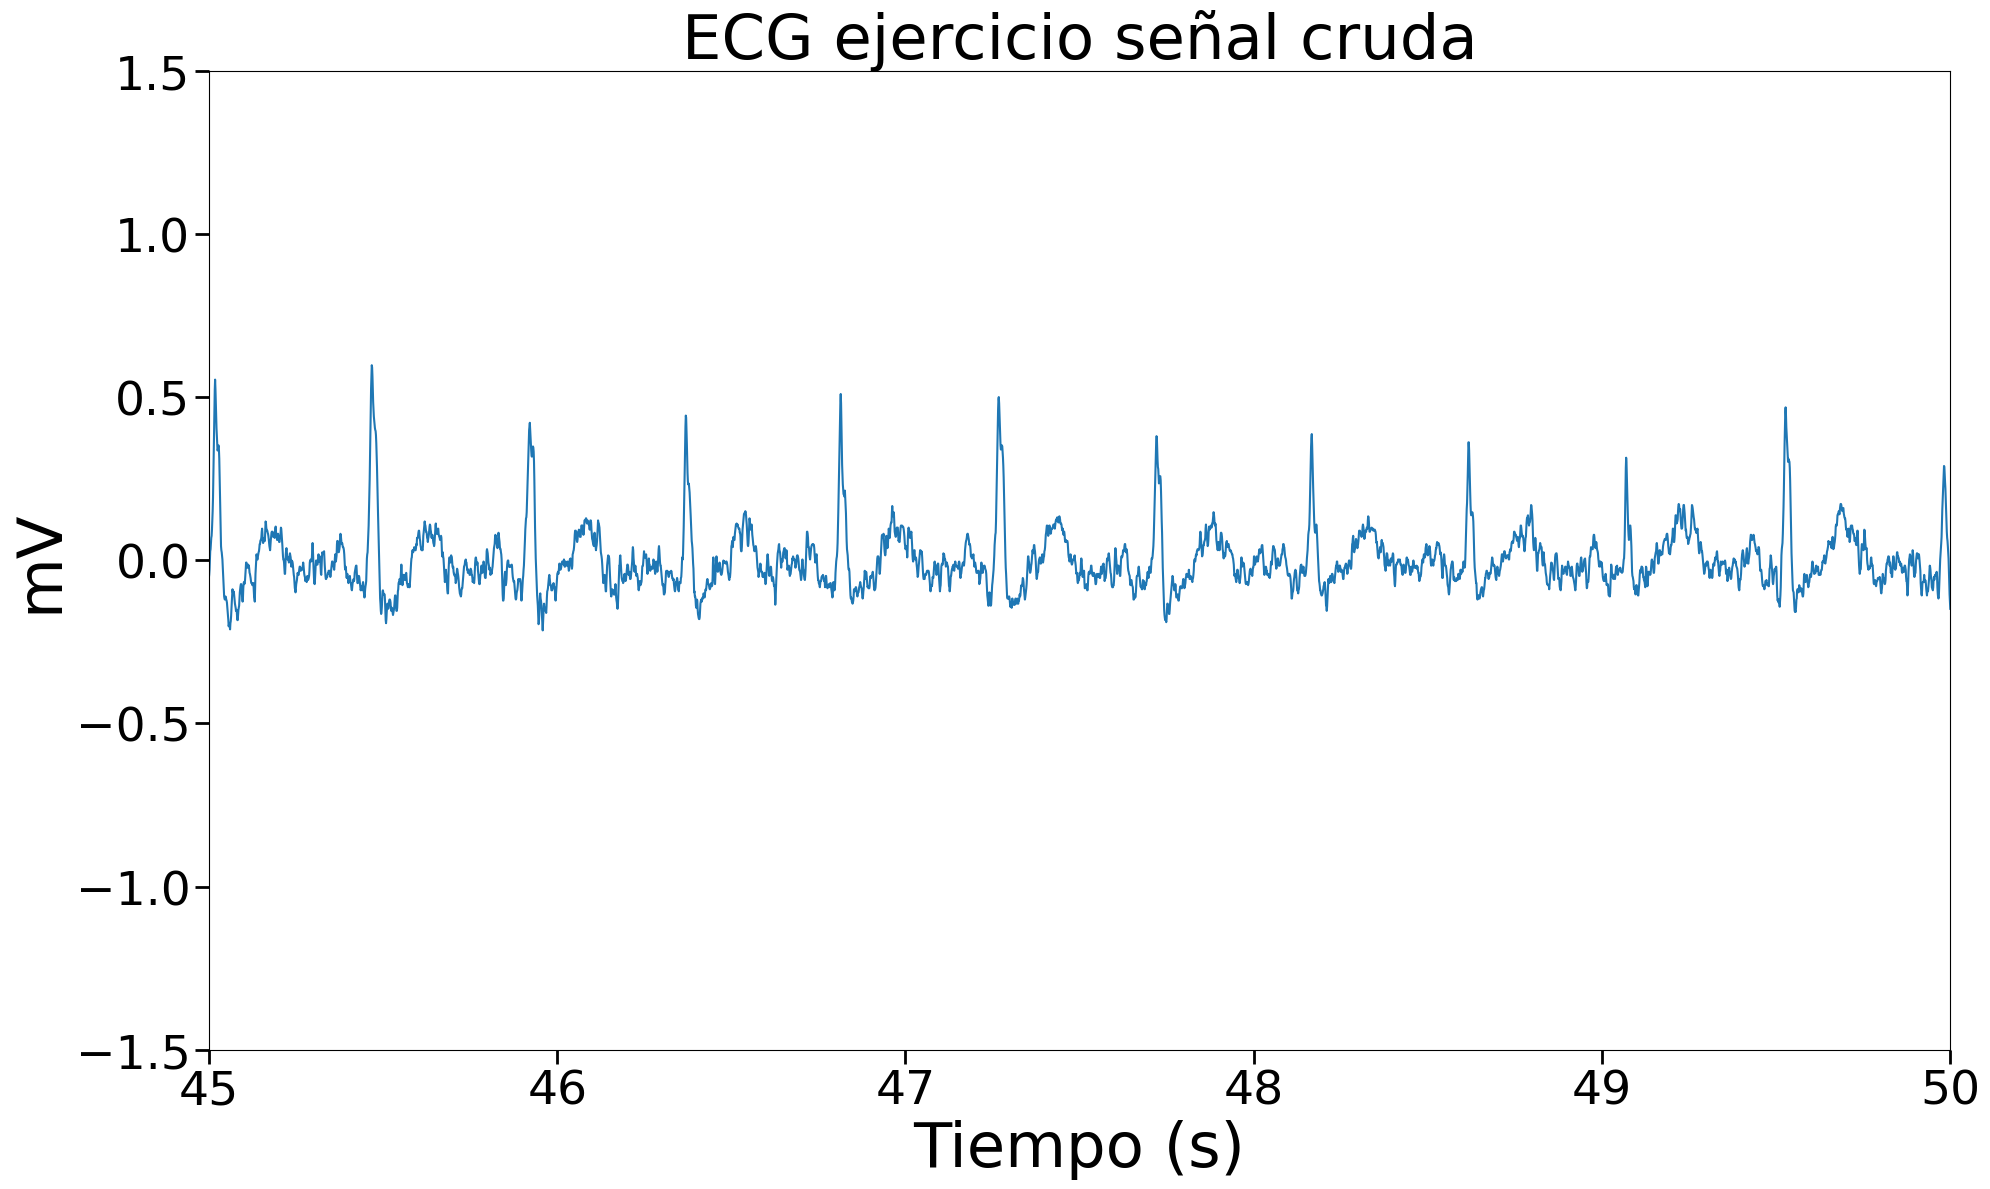

In [153]:
data=np.loadtxt("./../Laboratorio 4/ecg_raw_data/ejercicio/opensignals_98D341FD4F0D_2024-04-19_12-46-31.txt",skiprows=3)
bits = 10 # Bits de la salida 
volt_range = 3.223 #Rango de voltaje en milivoltios
data_mV = (data[:,5] * volt_range/(2**bits - 1)) # convertir los bits a mV
data_mV = data_mV - np.mean(data_mV) # Centrar la señal
time = np.arange(len(data_mV))/1000 
plt.figure(figsize=(20,12))

plt.plot(time,data_mV)

plt.ylim(-1.5, 1.5)
plt.xlim(45, 50)
plt.tick_params(axis='both', which='major', labelsize=34, width=2, length=10)
plt.xlabel('Tiempo (s)', fontsize=45)
plt.ylabel('mV', fontsize=45)
plt.title('ECG ejercicio señal cruda', fontsize=45)
plt.tight_layout()

plt.savefig("plots/ecg-ejercicio-cruda.png")

#Tomamos solo 5 segundos de la señal
y_1=data_mV[45000:50000]

Fs = 1000
Ts=1/Fs # Determinar el periodo de muestreo
t_1 = np.arange(0, len(y_1)*Ts, Ts) # Crear vector de tiempo considerando periodo de muestreo


# Ejercicio Wavelet

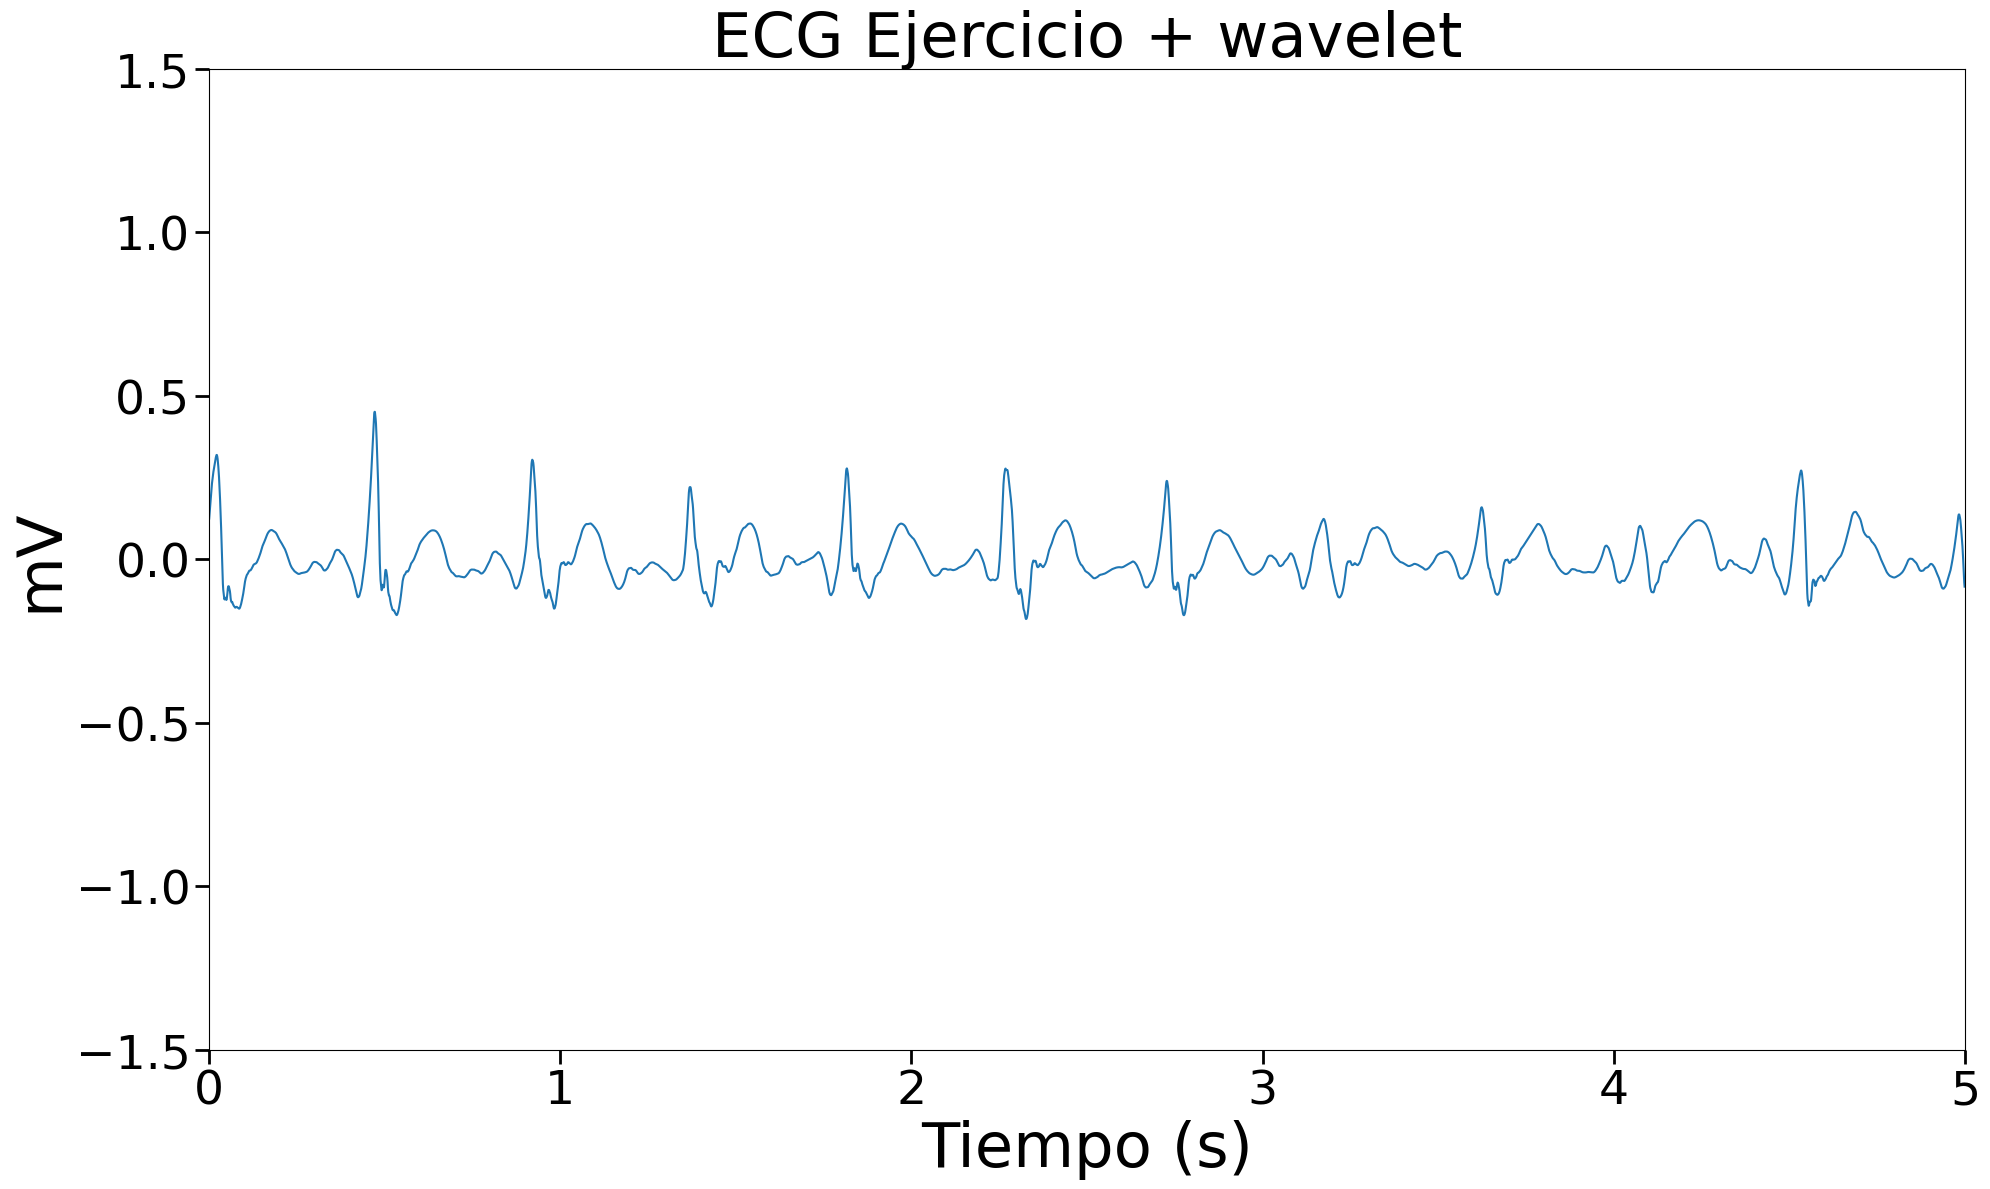

In [154]:
# Calculate coefficients
coeffs = pywt.wavedec(y_1, 'db4', level=5)

# Calculate the thresholds
n = len(y_1)
T_values = calculate_T(coeffs, n, C)

# Apply the thresholds
thresholded_coeffs = soft_threshold(coeffs, T_values)

# Reconstruct the signal
y_denoised = pywt.waverec(thresholded_coeffs, 'db4')

#plot
plt.figure(figsize=(20,12))
plt.plot(t_1, y_denoised, label='Señal Denoised')
plt.ylim(-1.5,1.5)
plt.xlim(0,5)
plt.tick_params(axis='both', which='major', labelsize=34, width=2, length=10)
plt.xlabel('Tiempo (s)', fontsize=45)
plt.ylabel('mV', fontsize=45)
plt.title('ECG Ejercicio + wavelet', fontsize=45)
plt.tight_layout()

plt.savefig("plots/ecg-ejercicio-wavelet.png")

plt.show()
